In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdf_helper as sh
%matplotlib inline

### Global Matplotlib Formatting

In [2]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

In [3]:
simulation = '/local_raid/honproj2/conan/sim_13_hall_2'
print(os.listdir())
os.chdir(simulation)

['hall_quadrupolar_plasmoid.png', 'out-of-plane-mag.ipynb']


### Out-of-Plane Magnetic Field Plot

In [13]:
data_dir = 'Data'
def plot(d, density, zs):
    data = sh.getdata(d,data_dir, verbose=False)
    t = data.Last_dump_time_requested.data
    g = data.Grid_Grid
    xb = g.data[0]
    yb = g.data[1]
    mag_field = data.Magnetic_Field_Bz.data
    print(np.shape(mag_field))
    fig, ax = plt.subplots(figsize=(10,6))
    X, Y = np.meshgrid(xb,yb,indexing='ij')
    #norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=600)

    pcm = plt.pcolormesh(X,Y,mag_field.data, cmap='magma')
    #pcm = plt.pcolormesh(X,-Y,current.data, cmap='magma')
    
    Bxc = data.Magnetic_Field_Bx_centred
    Byc = data.Magnetic_Field_By_centred
    g = data.Grid_Grid_mid
    xb = g.data[0]
    yb = g.data[1]
    X, Y = np.meshgrid( xc, yc)
    mfl = ax.streamplot(X, Y, np.transpose(Bxc.data), np.transpose(Byc.data), color = 'white', linewidth=1, density=density);
   
    # Plot the mirrored negative y values
    plt.xlabel(r'$x$', size=30)
    plt.ylabel(r'$z$', size=30)
    plt.ylim(zs[0],zs[1])
    plt.xlim(-0.5, 0.5)

    
    fig.suptitle(f'Out-Of-Plane Magnetic Field'+r' $B_y$' + fr' at time $t=$ {np.round(t, 4)}', size=25, x = 0.44)
    #ax.set_aspect('equal')
    cbar = fig.colorbar(pcm)
    cbar.set_label(r'Current Density $J_y$', size=25, font='ariel')
    
    plt.show()
    return fig


### Out-of-Plane Magnetic Field Stacked Plot

In [74]:
data_dir = 'Data'
def plot_staked(d, density1, density2, zs1, zs2):
    data = sh.getdata(d, data_dir, verbose=False)
    t = data.Last_dump_time_requested.data
    
    # For the first subplot
    g = data.Grid_Grid
    xb = g.data[0]
    yb = g.data[1]
    mag_field = data.Magnetic_Field_Bz.data
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
    X, Y = np.meshgrid(xb, yb, indexing='ij')
    
    pcm = ax[0].pcolormesh(X, Y, mag_field, cmap='magma')
    pcm2 = ax[1].pcolormesh(X, Y, mag_field, cmap='magma')
    
    Bxc = data.Magnetic_Field_Bx_centred
    Byc = data.Magnetic_Field_By_centred
    g = data.Grid_Grid_mid
    xb = g.data[0]
    yb = g.data[1]
    X, Y = np.meshgrid( xc, yc)
    ax[0].streamplot(X, Y, np.transpose(Bxc.data), np.transpose(Byc.data), color='white', linewidth=1, density=density1)
    ax[0].set_title(r'$z \in [-0.2,0.2]$', size=22,pad=10)
    ax[0].set_ylabel(r'$z$', size=30)
    ax[0].set_ylim(zs1[0], zs1[1])
    ax[0].tick_params(left=True, labelleft=True, bottom=True, labelbottom=False)
    ax[0].set_xlim(-0.5, 0.5)
    
    ax[1].streamplot(X, Y, np.transpose(Bxc.data), np.transpose(Byc.data), color='white', linewidth=1, density=density2)
    ax[1].set_xlabel(r'$x$', size=30)
    ax[1].set_title(r'$z \in [-0.5,0.5]$', size=22, pad=10)
    ax[1].set_ylabel(r'$z$', size=30)
    ax[1].set_ylim(zs2[0], zs2[1])
    ax[1].set_xlim(-0.5, 0.5)
    
    # Adjustments to the figure title and colorbar
    fig.suptitle(f'Out-Of-Plane Magnetic Field' + r' $B_y$' + fr' at time $t=$ {np.round(t, 4)}', size=25, x=0.57)
    cbar_left = 1
    cbar_bottom = 0.115# very sensitive
    cbar_width = 0.02
    cbar_height = 0.758
    
    
    cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
    cbar = fig.colorbar(pcm, cax=cbar_ax)
    cbar.set_label(r'Current Density $J_y$', size=30, font='ariel')
    
    plt.tight_layout()
    plt.show()
    return fig

### Plasmoid and Hall 

(400, 400)


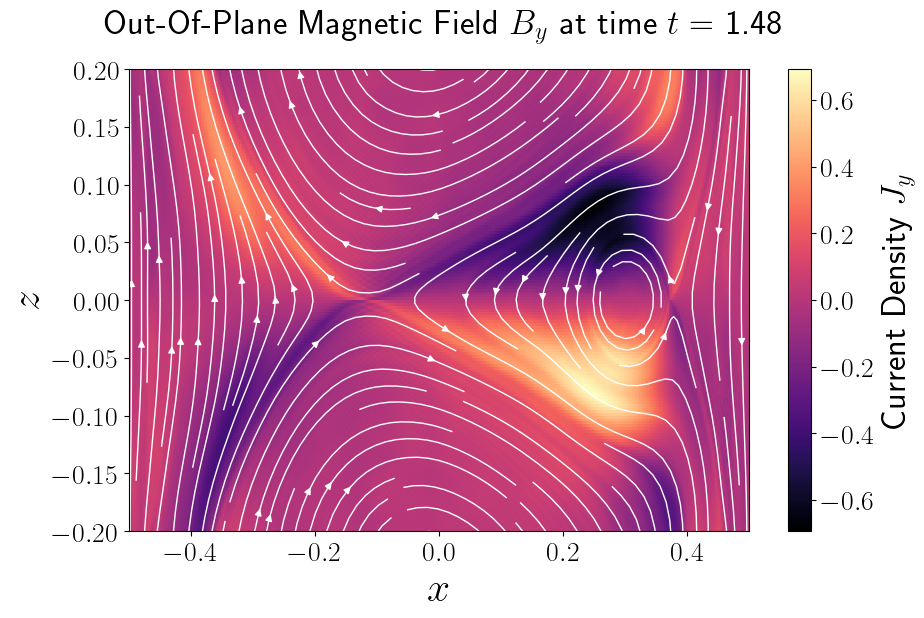

In [29]:
fig = plot(74, 2, [-0.2, 0.2])
#fig.savefig('hall_quadrupolar_plasmoid.png')

#### Local and Full Domain

/tmp/ipykernel_1009075/2842721412.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


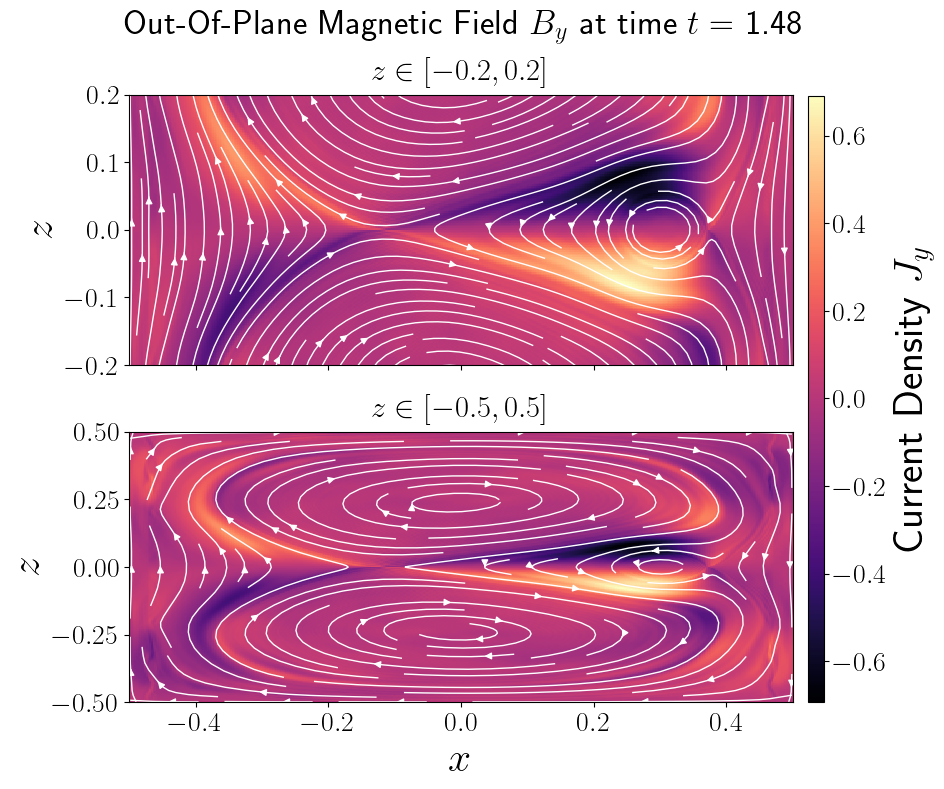

In [77]:
fig = plot_staked(74, 2, 1, [-0.2, 0.2],[-0.5,0.5])
fig.savefig('hall_quadrupolar_plasmoid_two_domains.png', bbox_inches='tight')


### Hall 

(400, 400)


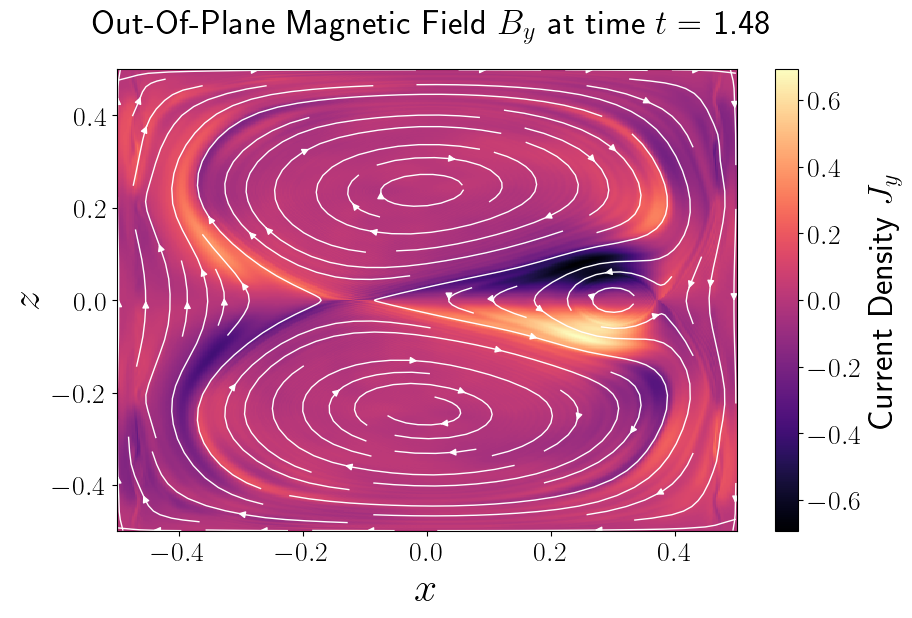

In [16]:
fig = plot(74, 1, [-0.5, 0.5])
#fig.savefig('hall_quadrupolar_plasmoid.png')